In [407]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'

train = pd.read_csv('C:\\Users\\endnj\\Downloads\\titanic\\train.csv')
test = pd.read_csv('C:\\Users\\endnj\\Downloads\\titanic\\test.csv')

In [408]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [409]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [411]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [412]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

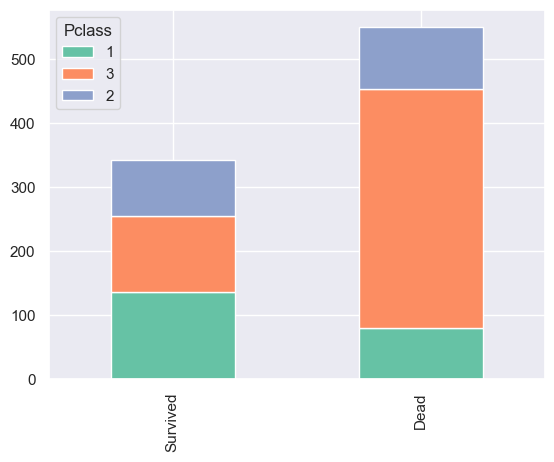

In [413]:
chart(train, 'Pclass')

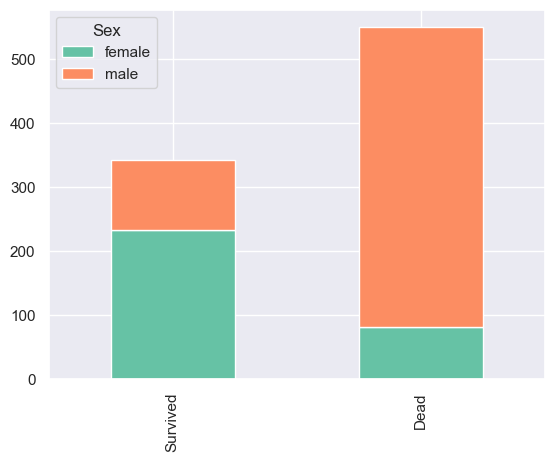

In [414]:
chart(train, 'Sex')

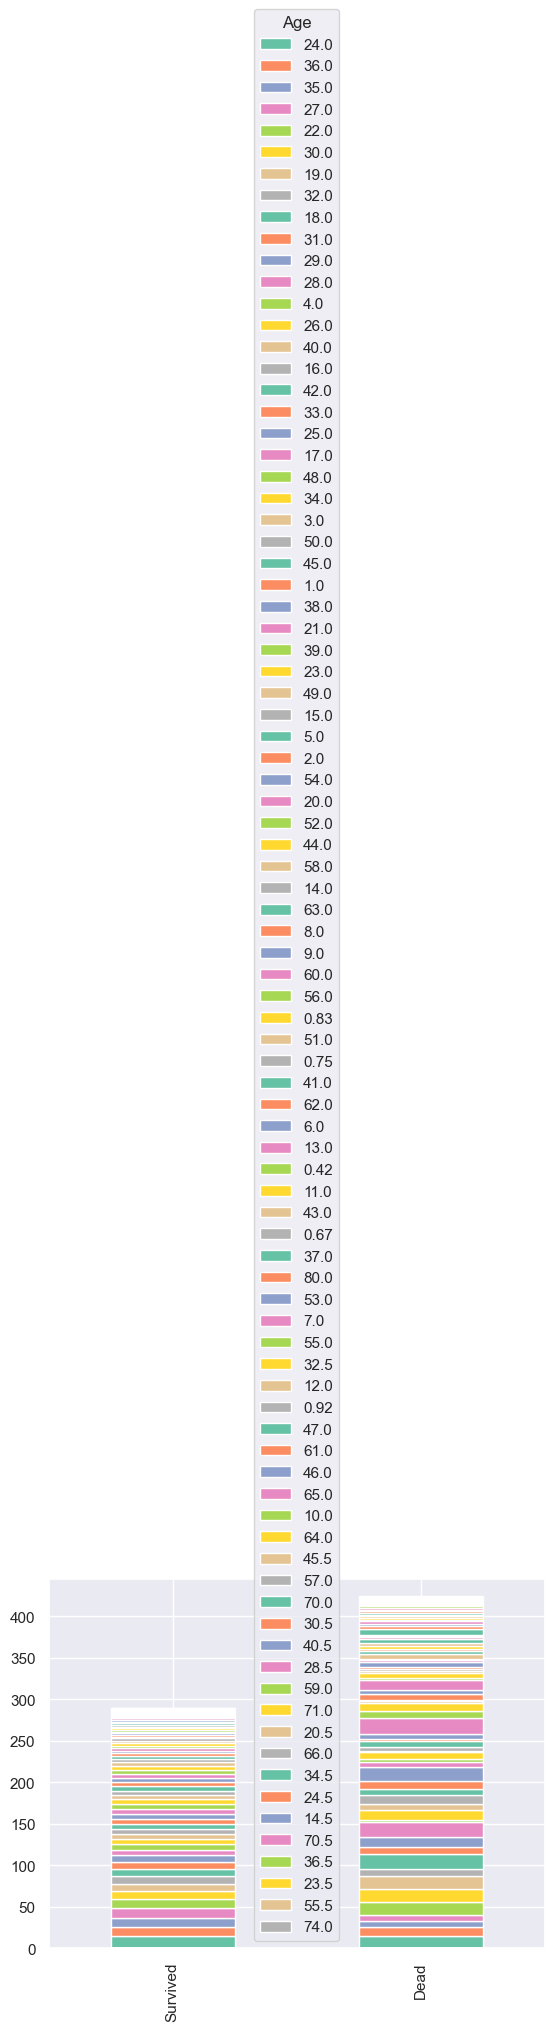

In [415]:
chart(train, 'Age')

In [416]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # 연령대 구간 설정
labels = ['0~10','10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']  # 라벨 지정

train['Age_Rounded'] = train['Age'].round()  # 소수점 값을 반올림하여 정수로 변환
test['Age_Rounded'] = test['Age'].round()

train['Age_Group'] = pd.cut(train['Age_Rounded'], bins=bins, labels=labels, right=False)
test['Age_Group'] = pd.cut(test['Age_Rounded'], bins=bins, labels=labels, right=False)

# 불필요한 열 제거
train.drop('Age_Rounded', axis=1, inplace=True)
test.drop('Age_Rounded', axis=1, inplace=True)



In [417]:
test.tail(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
368,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4000,NaN,C,40s
369,1261,2,"Pallas y Castello, Mr. Emilio",male,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C,20s
370,1262,2,"Giles, Mr. Edgar",male,21.0,1,0,28133,11.5000,NaN,S,20s
371,1263,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,30s
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,40s
373,1265,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S,40s
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S,50s
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,40s
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S,20s
377,1269,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S,20s


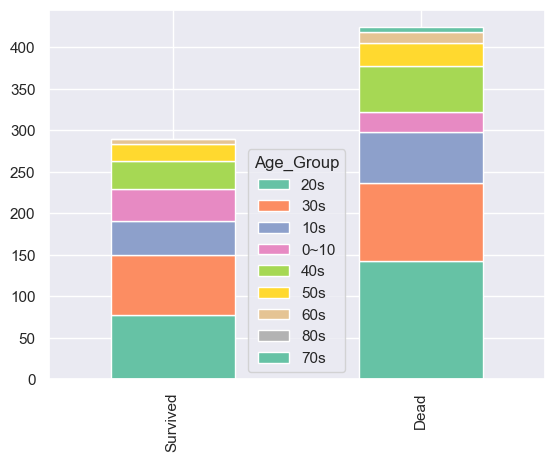

In [418]:
chart(train, 'Age_Group')

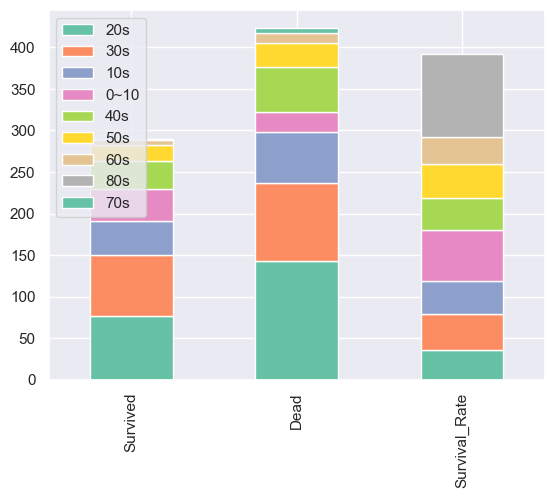

In [419]:
def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    
    df.index = ['Survived', 'Dead']

    # 생존율 계산
    df.loc['Survival_Rate'] = (df.loc['Survived'] / (df.loc['Survived'] + df.loc['Dead'])) * 100

    ax = df.plot(kind='bar', stacked=True)
    plt.legend(loc='upper left')

# 함수 호출
chart(train, 'Age_Group')



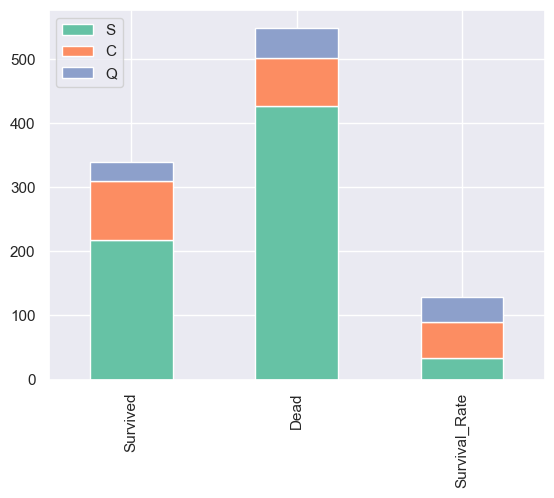

In [420]:
chart(train, 'Embarked')

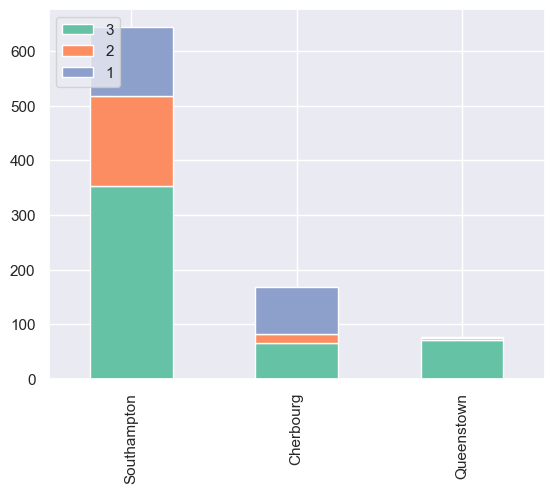

In [421]:
def chart_1(dataset, feature):
    Southampton = dataset[dataset['Embarked'] == 'S'][feature].value_counts()
    Cherbourg = dataset[dataset['Embarked'] == 'C'][feature].value_counts()
    Queenstown = dataset[dataset['Embarked'] == 'Q'][feature].value_counts()

    df = pd.DataFrame([Southampton, Cherbourg, Queenstown])
    
    df.index = ['Southampton', 'Cherbourg', 'Queenstown']

    ax = df.plot(kind='bar', stacked=True)
    plt.legend(loc='upper left')

# 함수 호출
chart_1(train, 'Pclass')

In [422]:
#union = pd.concat([train.drop('Survived', axis=1), test], axis=0)

#whole = [union]

In [423]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30s
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50s
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0~10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20s
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10s


In [424]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Pclass       1309 non-null   int64   
 2   Name         1309 non-null   object  
 3   Sex          1309 non-null   int64   
 4   Age          1046 non-null   float64 
 5   SibSp        1309 non-null   int64   
 6   Parch        1309 non-null   int64   
 7   Ticket       1309 non-null   object  
 8   Fare         1308 non-null   float64 
 9   Cabin        295 non-null    object  
 10  Embarked     1307 non-null   object  
 11  Age_Group    1046 non-null   category
 12  Initial      1309 non-null   object  
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 134.6+ KB


In [425]:
dic = {"male": 0, "female": 1}
train.loc[:, 'Sex'] = train.loc[:, 'Sex'].map(dic)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,30s


In [426]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Fare'] = train['Fare'].fillna(33)

In [427]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,30s


In [428]:
mean_value = union['Fare'].mean()
print(mean_value)

33.29547928134557


In [430]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [431]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [432]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
0,40,0,528,0,9
1,0,186,1,127,0


In [433]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [434]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46
train.Age.isnull().any()
train.Age.isnull().sum()

0

In [435]:
train.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Initial
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,20s,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,30s,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,30s,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,30s,Mr


In [436]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     891 non-null    object  
 11  Age_Group    714 non-null    category
 12  Initial      891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [437]:
train['Age'].describe()

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [438]:
train['AgeCut'] = pd.qcut(train['Age'], 4, labels=[0,1,2,3])
train.drop('Age', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Initial,AgeCut
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,20s,Mr,0
1,2,1,1,1,1,0,PC 17599,71.2833,C85,C,30s,Mrs,3
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,20s,Miss,1
3,4,1,1,1,1,0,113803,53.1000,C123,S,30s,Mrs,2
4,5,0,3,0,0,0,373450,8.0500,NaN,S,30s,Mr,2


In [439]:
train['FareCut'] = pd.qcut(train['Fare'], 4, labels=[0,1,2,3])
train.drop('Fare', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,Initial,AgeCut,FareCut
0,1,0,3,0,1,0,A/5 21171,NaN,S,20s,Mr,0,0
1,2,1,1,1,1,0,PC 17599,C85,C,30s,Mrs,3,3
2,3,1,3,1,0,0,STON/O2. 3101282,NaN,S,20s,Miss,1,1
3,4,1,1,1,1,0,113803,C123,S,30s,Mrs,2,3
4,5,0,3,0,0,0,373450,NaN,S,30s,Mr,2,1


In [440]:
dic = {"S": 0, "C": 1, "Q": 2}
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].map(dic)
test.loc[:, 'Embarked'] = test.loc[:, 'Embarked'].map(dic)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,Initial,AgeCut,FareCut
0,1,0,3,0,1,0,A/5 21171,NaN,0,20s,Mr,0,0
1,2,1,1,1,1,0,PC 17599,C85,1,30s,Mrs,3,3
2,3,1,3,1,0,0,STON/O2. 3101282,NaN,0,20s,Miss,1,1
3,4,1,1,1,1,0,113803,C123,0,30s,Mrs,2,3
4,5,0,3,0,0,0,373450,NaN,0,30s,Mr,2,1


In [442]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,Initial,AgeCut,FareCut
0,1,0,3,0,1,0,A/5 21171,NaN,0,20s,Mr,0,0
1,2,1,1,1,1,0,PC 17599,C85,1,30s,Mrs,3,3
2,3,1,3,1,0,0,STON/O2. 3101282,NaN,0,20s,Miss,1,1
3,4,1,1,1,1,0,113803,C123,0,30s,Mrs,2,3
4,5,0,3,0,0,0,373450,NaN,0,30s,Mr,2,1


In [443]:
train.drop(['Initial','PassengerId','Age_Group'],axis=1,inplace=True)

In [445]:
train.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [446]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCut,FareCut
0,0,3,0,1,0,0,0,0
1,1,1,1,1,0,1,3,3
2,1,3,1,0,0,0,1,1
3,1,1,1,1,0,0,2,3
4,0,3,0,0,0,0,2,1


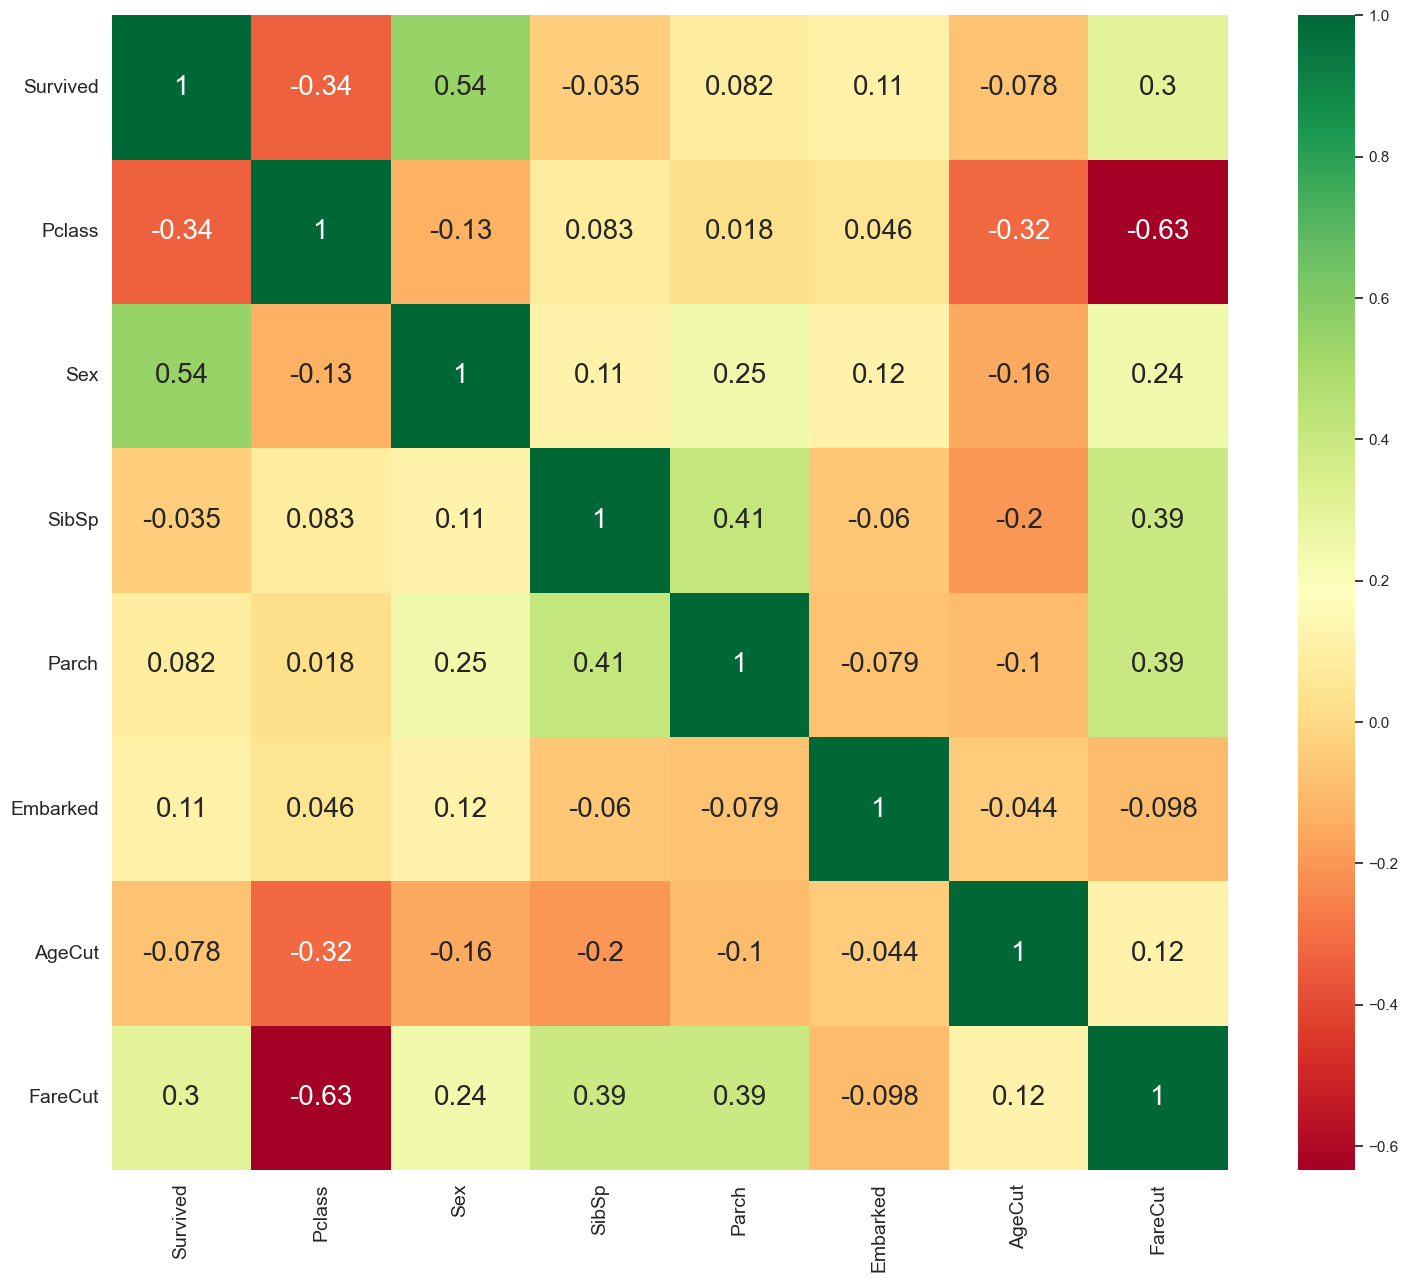

In [448]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [449]:
dic = {"male": 0, "female": 1}
test.loc[:, 'Sex'] = test.loc[:, 'Sex'].map(dic)
test['Embarked'] = test['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(33)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Initial
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,30s,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,40s,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,60s,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,20s,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,20s,Mrs


In [450]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
0,2,0,1,21,0,240,0,0,2
1,0,1,0,0,78,0,72,1,0


In [451]:
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
0,21,0,241,0,4
1,0,79,0,73,0


In [452]:
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=46
test.Age.isnull().any()
test.Age.isnull().sum()


0

In [453]:
test['AgeCut'] = pd.qcut(test['Age'], 4, labels=[0,1,2,3])
test.drop('Age', axis=1, inplace=True)
test.head()


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Initial,AgeCut
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,NaN,2,30s,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,7.0000,NaN,0,40s,Mrs,3
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,NaN,2,60s,Mr,3
3,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,NaN,0,20s,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,12.2875,NaN,0,20s,Mrs,0


In [454]:
test['FareCut'] = pd.qcut(test['Fare'], 4, labels=[0,1,2,3])
test.drop('Fare', axis=1, inplace=True)
test.head()


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,Initial,AgeCut,FareCut
0,892,3,"Kelly, Mr. James",0,0,0,330911,NaN,2,30s,Mr,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,NaN,0,40s,Mrs,3,0
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,NaN,2,60s,Mr,3,1
3,895,3,"Wirz, Mr. Albert",0,0,0,315154,NaN,0,20s,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,NaN,0,20s,Mrs,0,1


In [455]:
test.drop(['Name','Ticket','Cabin','Initial','PassengerId','Age_Group'],axis=1,inplace=True)

In [456]:
test.head

<bound method NDFrame.head of      Pclass Sex  SibSp  Parch  Embarked AgeCut FareCut
0         3   0      0      0         2      2       0
1         3   1      1      0         0      3       0
2         2   0      0      0         2      3       1
3         3   0      0      0         0      1       1
4         3   1      1      1         0      0       1
..      ...  ..    ...    ...       ...    ...     ...
413       3   0      0      0         0      2       1
414       1   1      0      0         1      3       3
415       3   0      0      0         0      3       0
416       3   0      0      0         0      2       1
417       3   0      1      1         1      0       2

[418 rows x 7 columns]>

In [457]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCut,FareCut
0,0,3,0,1,0,0,0,0
1,1,1,1,1,0,1,3,3
2,1,3,1,0,0,0,1,1
3,1,1,1,1,0,0,2,3
4,0,3,0,0,0,0,2,1


In [458]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeCut,FareCut
0,0,3,0,1,0,0,0,0
1,1,1,1,1,0,1,3,3
2,1,3,1,0,0,0,1,1
3,1,1,1,1,0,0,2,3
4,0,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,1
887,1,1,1,0,0,0,0,2
888,0,3,1,1,2,0,0,2
889,1,1,0,0,0,1,1,2


In [459]:
test

,Pclass,Sex,SibSp,Parch,Embarked,AgeCut,FareCut
0,3,0,0,0,2,2,0
1,3,1,1,0,0,3,0
2,2,0,0,0,2,3,1
3,3,0,0,0,0,1,1
4,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...
413,3,0,0,0,0,2,1
414,1,1,0,0,1,3,3
415,3,0,0,0,0,3,0
416,3,0,0,0,0,2,1


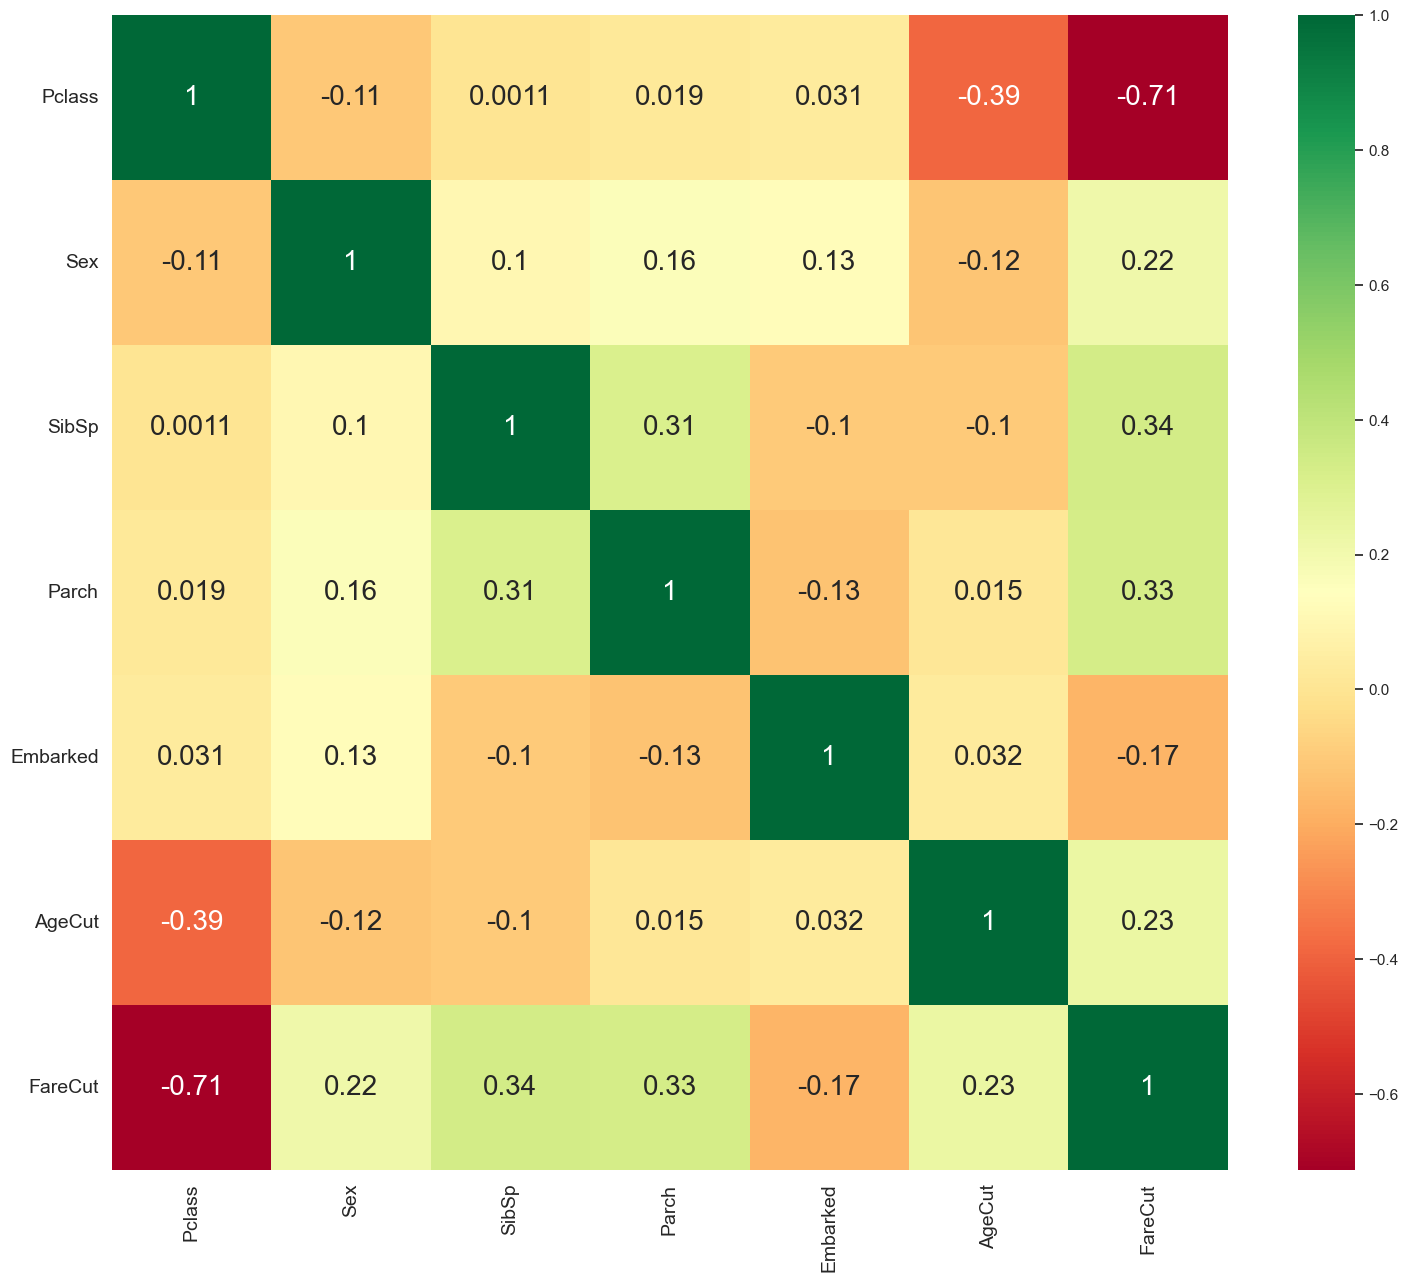

In [461]:
sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

NameError: name 'y' is not defined

In [399]:
train,test=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train[train.columns[1:]]
Y=train['Survived']
train_Y = np.ravel(train_Y)
test_Y = np.ravel(test_Y)

In [400]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy of rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy of rbf SVM is  0.7608695652173914


In [401]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy of Linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy of Linear SVM is  0.7391304347826086


In [402]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy of the LogisticRegression is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy of the LogisticRegression is  0.717391304347826


In [403]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Accuracy of the Decision Tree is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy of the Decision Tree is  0.75


In [404]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Accuracy of the KNN is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy of the KNN is  0.75


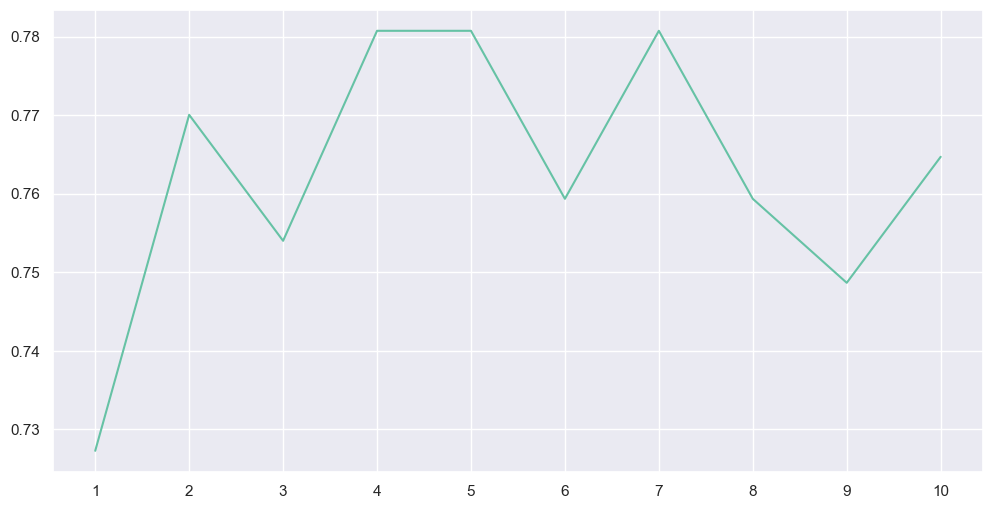

Accuracy of different values of n are: [0.72727273 0.77005348 0.7540107  0.78074866 0.78074866 0.75935829
 0.78074866 0.75935829 0.7486631  0.76470588] with the max value as 0.7807486631016043


In [347]:
a_index = list(range(1, 11))
a = []  # 빈 리스트로 초기화

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction, test_Y)
    a.append(accuracy)  # 정확도를 리스트에 추가

# 리스트를 Pandas Series로 변환
a = pd.Series(a, index=a_index)

plt.plot(a_index, a)
plt.xticks(a_index)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracy of different values of n are:', a.values, 'with the max value as', a.values.max())


In [348]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('Accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy of the NaiveBayes is  0.7807486631016043


In [349]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('Accuracy of the Random Forest is ',metrics.accuracy_score(prediction7,test_Y))

Accuracy of the Random Forest is  0.7540106951871658


In [352]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,shuffle=True, random_state=22)
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=10)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.765962,0.020917
Radial Svm,0.786575,0.048603
Logistic Regression,0.784091,0.054575
KNN,0.765803,0.049091
Decision Tree,0.800581,0.045233
Naive Bayes,0.740539,0.081427
Random Forest,0.768393,0.056472


<Axes: >

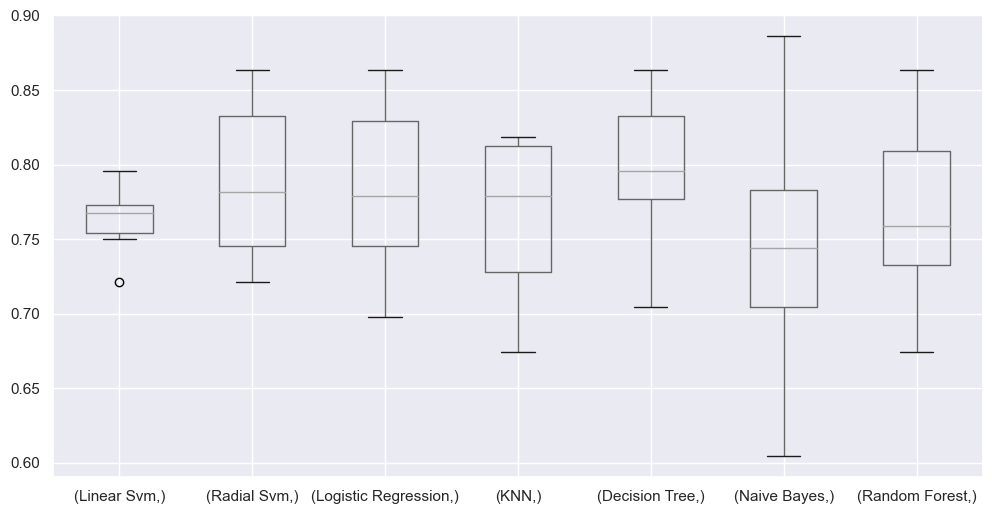

In [353]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

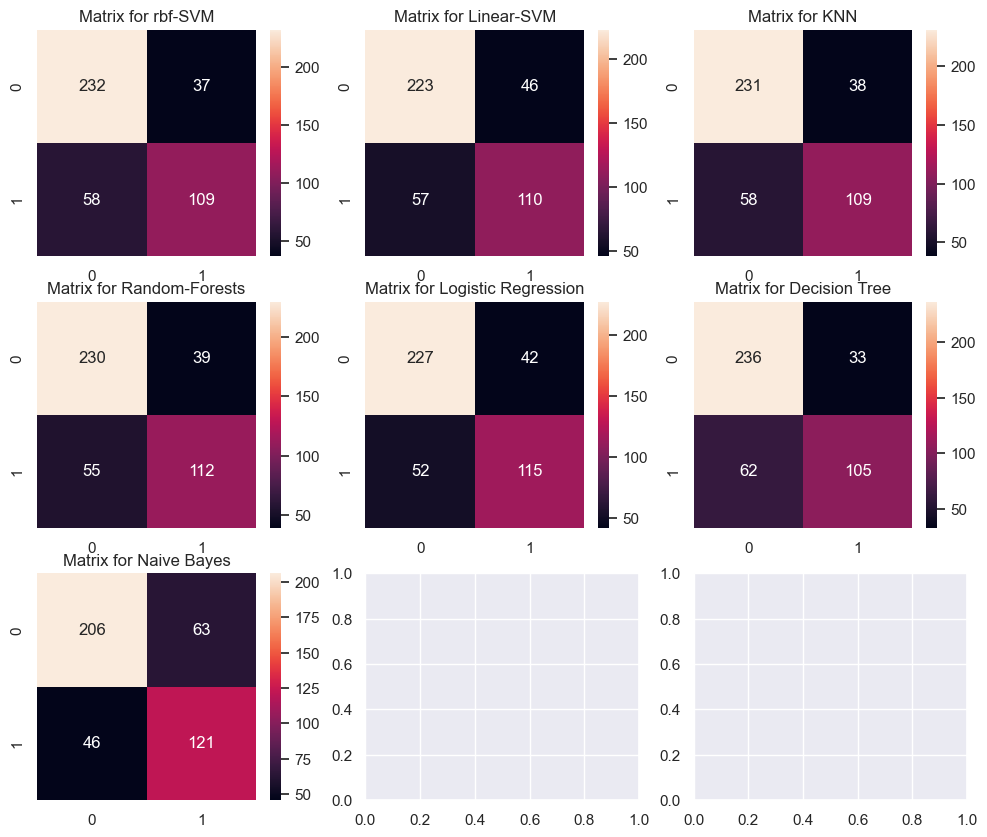

In [354]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred=cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred=cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [355]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8027951933124348
SVC(C=0.4, gamma=0.2)


In [356]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7890804597701149
RandomForestClassifier(n_estimators=800, random_state=0)


In [363]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=7)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.4,gamma=0.2)),
                                              ('RFor',RandomForestClassifier(n_estimators=800,random_state=0)),
                                              ('LR',LogisticRegression(solver='liblinear' ,C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],
                                 voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is : ',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring="accuracy")
print('The cross validated score is',cross.mean())

TypeError: ufunc 'expit' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [369]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=4),random_state=0,n_estimators=600)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is : ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is: ',result.mean)

The accuracy for bagged KNN is :  0.7807486631016043
The cross validated score for bagged KNN is:  <built-in method mean of numpy.ndarray object at 0x000002C92222A130>


In [371]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is : ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is : ',result.mean())

The accuracy for bagged Decision Tree is :  0.7647058823529411
The cross validated score for bagged Decision Tree is :  0.7869978858350951


In [372]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7683932346723044


In [373]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is : ',result.mean())

The cross validated score for Gradient Boosting is :  0.8076638477801268


In [375]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is : ',result.mean())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\endnj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1500, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 1529, in __init__
    self._init(
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 1588, in _init
    it.reraise()
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
                                        ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "C:\Users\endnj\anaconda3\Lib\site-packages\xgboost\data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Sex: object, Embarked: object, AgeCut: category, FareCut: category


In [379]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.7821316614420063
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


In [380]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8097439916405433
GradientBoostingClassifier(learning_rate=0.05, n_estimators=400)


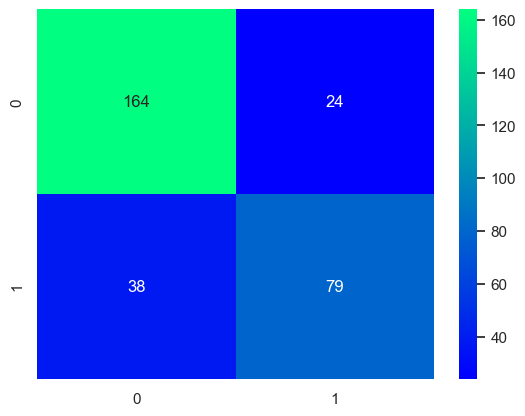

In [383]:
ada=GradientBoostingClassifier(learning_rate=0.05, n_estimators=400)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

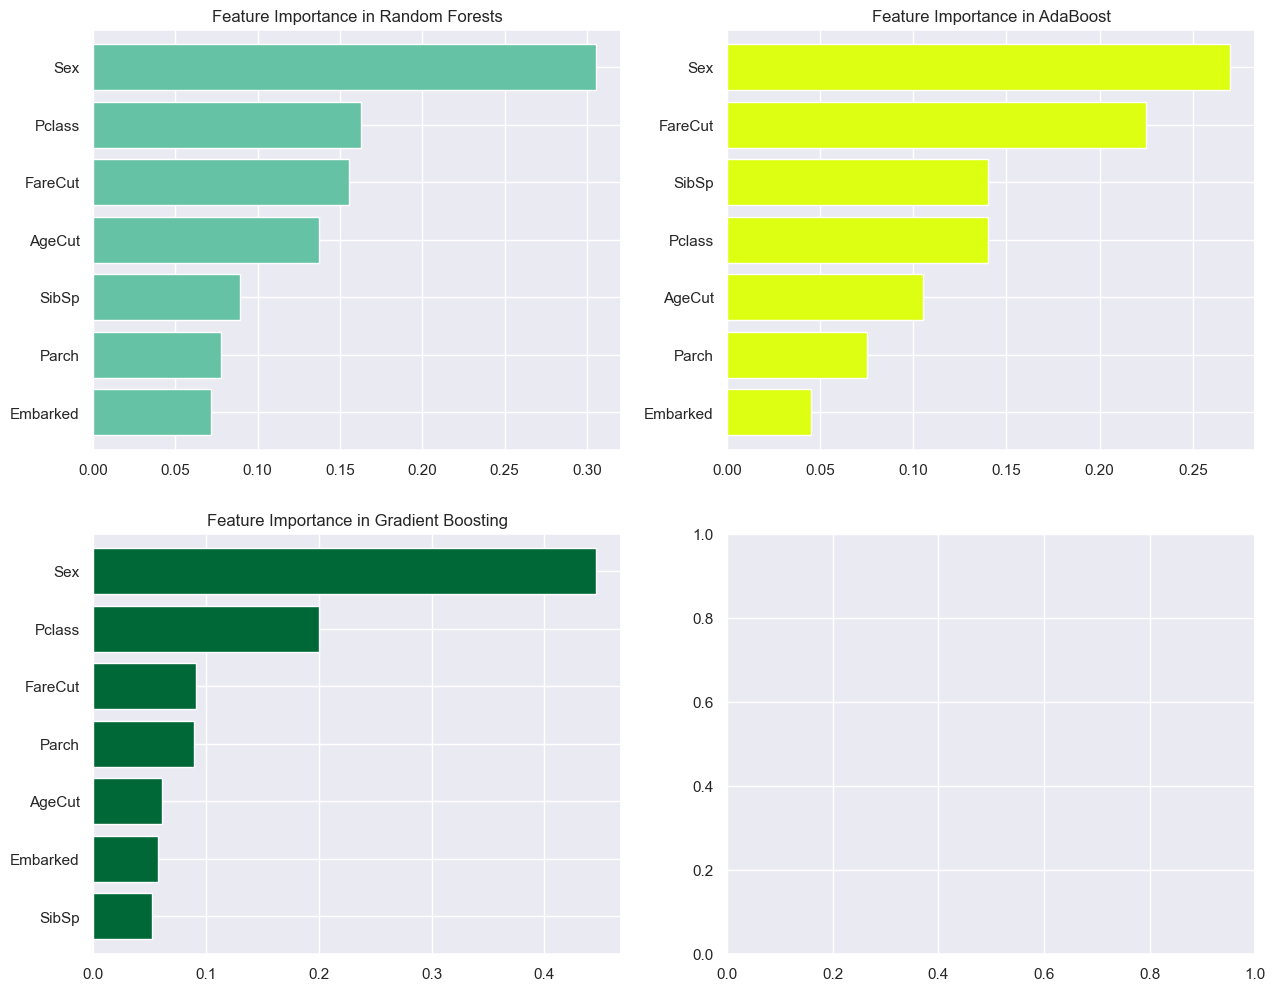

In [390]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
plt.show()

In [396]:
import xgboost as xgb 
from xgboost import XGBClassifier

xgb  = XGBClassifier()
xgb.fit(train_X, train_Y)

Y_pred = xgb.predict(test_X)

xgb.score(train_X, train_Y)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:AgeCut: category, FareCut: category

In [397]:
print(train_X)


     Pclass  SibSp  Parch AgeCut FareCut  Sex_0  Sex_1  Embarked_0  \
415       3      0      0      2       1  False   True        True   
33        2      0      0      3       1   True  False        True   
644       3      2      1      0       2  False   True       False   
676       3      0      0      1       1   True  False        True   
755       2      1      1      0       2   True  False        True   
..      ...    ...    ...    ...     ...    ...    ...         ...   
32        3      0      0      0       0  False   True       False   
386       3      5      2      0       3   True  False        True   
368       3      0      0      0       0  False   True       False   
817       2      1      1      2       3   True  False       False   
187       1      0      0      3       2   True  False        True   

     Embarked_1  Embarked_2  
415       False       False  
33        False       False  
644        True       False  
676       False       False  
755      